In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint and parameters
url = "https://api.fda.gov/drug/enforcement.json?search=report_date:[20200101+TO+20240804]&limit=500"

# Send a GET request to the API
response = requests.get(url)


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of results (recalls)
    recalls = data.get('results', [])
    
    # Create a DataFrame from the list of recall records
    recall_df = pd.DataFrame(recalls)
    
    # Save the DataFrame to a CSV file
    #recall_df.to_csv('output_data/fda_drug_enforcement_data.csv', index=False)

In [2]:
clean_df = recall_df.rename(columns={"status": "Status", 
                                     "city": "City",
                                     "state": "State",
                                     "country":"Country",
                                     "classification":"Classification",
                                     "openfda":"Open FDA",
                                     "product_type":"Product Type",
                                     "event_id":"Event ID",
                                     "recalling_firm":"Recalling Firm",
                                     "address_1":"Address 1",
                                     "address_2":"Address 2",
                                     "postal_code":"Postal Code",
                                     "voluntary_mandated":"Voluntary Mandated",
                                     "initial_firm_notification":"Initial Firm Notification",
                                     "distribution_pattern":"Distribution Pattern",
                                     "recall_number":"Recall Number",
                                     "product_description":"Product Description",
                                     "product_quantity":"Product Quantity",
                                     "reason_for_recall":"Reason for Recall",
                                     "recall_initiation_date":"Recall Initiation Date",
                                     "center_classification_date":"Center Classification Date",
                                     "termination_date":"Termination Date",
                                     "report_date":"Report Date",
                                     "code_info":"Code Info",
                                     
                                    
                                    })

#clean_df.head()


In [3]:
#Save cleaned DataFrame to output
clean_df.to_csv('output_data/fda_drug_enforcement_data.csv', index=False)

In [4]:
recalling_firm_df = clean_df["Recalling Firm"].unique()
recalling_firm_count_df = len(recalling_firm_df)
print("Total amount of unique Recalling Firms associated to the FDA Recalls is "  + str(recalling_firm_count_df) )

Total amount of unique Recalling Firms associated to the FDA Recalls is 187


In [5]:
firm_count_df = clean_df["Recalling Firm"].value_counts().head(10)

print(firm_count_df)

Recalling Firm
Cardinal Health Inc.                                 20
Central Admixture Pharmacy Services, Inc.            19
Akorn, Inc.                                          19
Vita Pharmacy, LLC dba Talon Compounding Pharmacy    18
Mckesson Medical-Surgical Inc. Corporate Office      16
Family Dollar Stores, Llc.                           12
Central Admixture Pharmacy Services Inc              11
Herbal Doctor Remedies                               10
Preferred Pharmaceuticals, Inc.                      10
Teva Pharmaceuticals USA                              8
Name: count, dtype: int64


In [6]:
# Amount of each class of drug recalls
clean_df['Classification'].value_counts()

Classification
Class II     405
Class I       48
Class III     47
Name: count, dtype: int64

In [7]:
#Clean DataFrame to only USA
US_recalls_df = clean_df[
    (clean_df['Country'] == 'United States') &
    (clean_df['Status'] == 'Terminated')
     ]             
#US_recalls_df.head()

In [8]:
#Cut down DataFrame further to specified columns
US_recalls_df= US_recalls_df[['Status', 'City', 'State', 'Country', 'Classification', 'Product Type', 'Recalling Firm', 'Product Description', 'Product Quantity', 'Reason for Recall', 'Recall Initiation Date', 'Termination Date']]

#US_recalls_df.head()

In [9]:
US_recalls_df.to_csv('output_data/us_recalls_data.csv', index=False)

In [10]:
# Amount of recalls per state
#US_recalls_df['State'].value_counts()

# MAKE GRAPHS AND VISUALIZATIONS 

#Which classification was recalled most and where.
#	-Class I
#	-Class II
#	-Class III
#Which companies had the most recalls
#	-Which type of drugs did they have recalled.
#How much time it takes to close a recall.
#	-who took most time to recall.

# Class I DataFrame and Bar Graph

In [11]:
#Class I recall DataFrame
classI_df = US_recalls_df[US_recalls_df['Classification'] == 'Class I']

#classI_df.head()

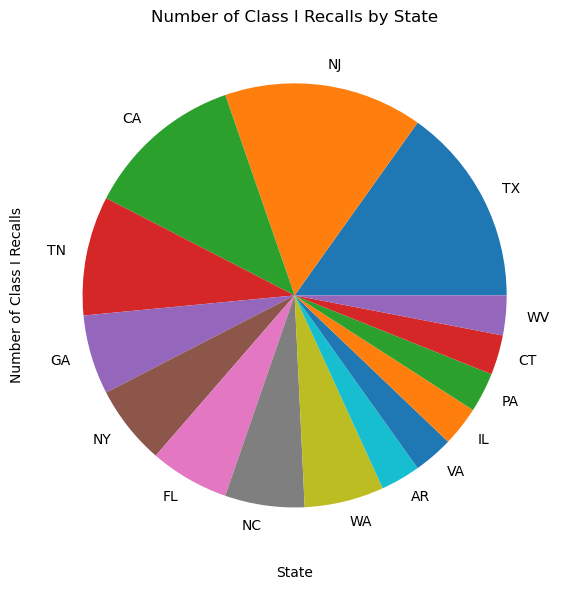

In [12]:
#Bar Graph of number of Class I recalls vs state
state_counts = classI_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='pie', color='pink')
plt.title('Number of Class I Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class I Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classI_recalls.jpeg")
#plt.show()


# Class II DataFrame and Bar Graph

In [13]:
#Class II recall DataFrame
classII_df = US_recalls_df[US_recalls_df['Classification'] == 'Class II']

#classII_df.head()


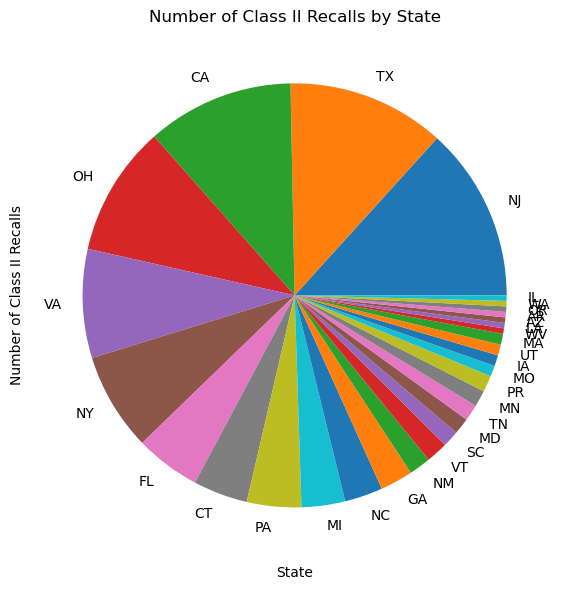

In [14]:
#Bar Graph of number of Class II recalls vs state
state_counts = classII_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='pie', color='skyblue')
plt.title('Number of Class II Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class II Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classII_recalls.jpeg")
plt.show()

# Class III DataFrame and Bar Graph

In [15]:
#Class III recall DataFrame
classIII_df = US_recalls_df[US_recalls_df['Classification'] == 'Class III']

#classIII_df.head()


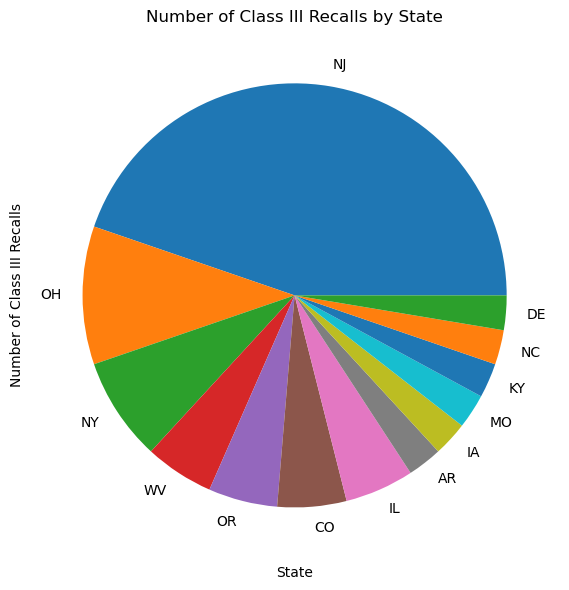

In [16]:
#Bar Graph of number of Class III recalls vs state
state_counts = classIII_df['State'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='pie', color='lightgreen')
plt.title('Number of Class III Recalls by State')
plt.xlabel('State')
plt.ylabel('Number of Class III Recalls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(". ./output_data/classIII_recalls.jpeg")
plt.show()

# Company Recalls DataFrame and BarGraphs

In [17]:
#Which companies had the most recalls
#	-Which type of drugs did they have recalled.
company_counts = US_recalls_df['Recalling Firm'].value_counts()

# Get the top companies with the most recalls
top_companies = company_counts  

# Display top companies
print("Firms with the Most Recalls:")
print(top_companies)

# Filter the original DataFrame for the top companies
top_company_names = top_companies.index
top_recalls_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_company_names)]

# Group by company and type of drug
drug_types_by_company = top_recalls_df.groupby(['Recalling Firm', 'Classification']).size().reset_index(name='Recall Count')

# Display the result
print("\nDrug Types Recalled by Top Companies:")
drug_types_by_company

Firms with the Most Recalls:
Recalling Firm
Cardinal Health Inc.                                 18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy    18
Mckesson Medical-Surgical Inc. Corporate Office      16
Herbal Doctor Remedies                               10
Teva Pharmaceuticals USA                              8
                                                     ..
Fresenius Medical Care, North America                 1
Pink Toyz                                             1
Custopharm, Inc.                                      1
US Compounding Inc                                    1
Milbar Laboratories, Inc.                             1
Name: count, Length: 132, dtype: int64

Drug Types Recalled by Top Companies:


,Recalling Firm,Classification,Recall Count
0,"ANI Pharmaceuticals, Inc.",Class II,1
1,AVKARE Inc.,Class I,1
2,AVKARE Inc.,Class II,1
3,"Accord Healthcare, Inc.",Class I,1
4,"Accord Healthcare, Inc.",Class II,5
...,...,...,...
145,"Washington Homeopathic Products, Inc.",Class II,1
146,"Washington Homeopathic Products, Inc.",Class III,1
147,West-Ward Columbus Inc,Class II,1
148,Wilshire Pharmaceuticals Inc,Class II,1


In [18]:
# Get the top ten companies with the most recalls
top_companies = company_counts.head(10)

# Display top ten companies
print("Top Ten Firms with the Most Recalls:")
print(top_companies)

# Filter the original DataFrame for the top ten companies
top_company_names = top_companies.index
top_recalls_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_company_names)]

# Group by company and type of drug
drug_types_by_company = top_recalls_df.groupby(['Recalling Firm', 'Classification', ]).size().reset_index(name='Recall Count')

# Display the result
print("\nDrug Types Recalled by Top Ten Companies:")
drug_types_by_company


Top Ten Firms with the Most Recalls:
Recalling Firm
Cardinal Health Inc.                                       18
Vita Pharmacy, LLC dba Talon Compounding Pharmacy          18
Mckesson Medical-Surgical Inc. Corporate Office            16
Herbal Doctor Remedies                                     10
Teva Pharmaceuticals USA                                    8
Teligent Pharma, Inc.                                       7
Fusion IV Pharmaceuticals, Inc. dba Axia Pharmaceutical     7
Pharmacy Innovations                                        7
Perrigo Company PLC                                         6
Accord Healthcare, Inc.                                     6
Name: count, dtype: int64

Drug Types Recalled by Top Ten Companies:


,Recalling Firm,Classification,Recall Count
0,"Accord Healthcare, Inc.",Class I,1
1,"Accord Healthcare, Inc.",Class II,5
2,Cardinal Health Inc.,Class II,17
3,Cardinal Health Inc.,Class III,1
4,"Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...",Class II,7
5,Herbal Doctor Remedies,Class II,10
6,Mckesson Medical-Surgical Inc. Corporate Office,Class II,16
7,Perrigo Company PLC,Class II,6
8,Pharmacy Innovations,Class II,7
9,"Teligent Pharma, Inc.",Class I,1


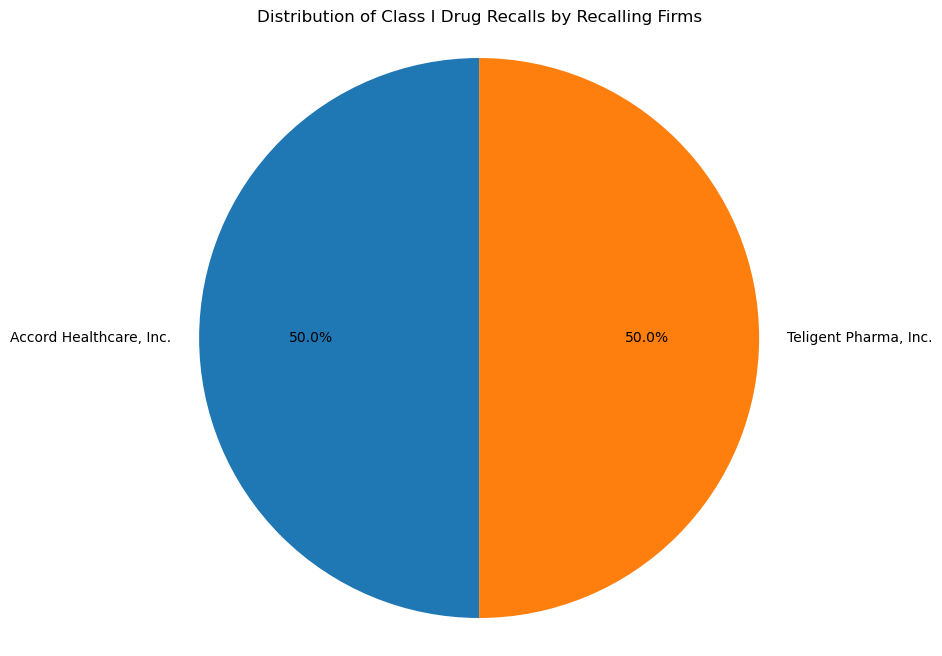

In [19]:
# Filter for Class I drugs
class_i_data = drug_types_by_company[drug_types_by_company['Classification'] == 'Class I']

# Create a pie chart for Class I recalls by each recalling firm
plt.figure(figsize=(10, 8))
plt.pie(class_i_data['Recall Count'], labels=class_i_data['Recalling Firm'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class I Drug Recalls by Recalling Firms')
plt.axis('equal')  

plt.savefig("./output_data/class_i_drug_recalls_firms.jpeg")  # Save the figure
plt.show()


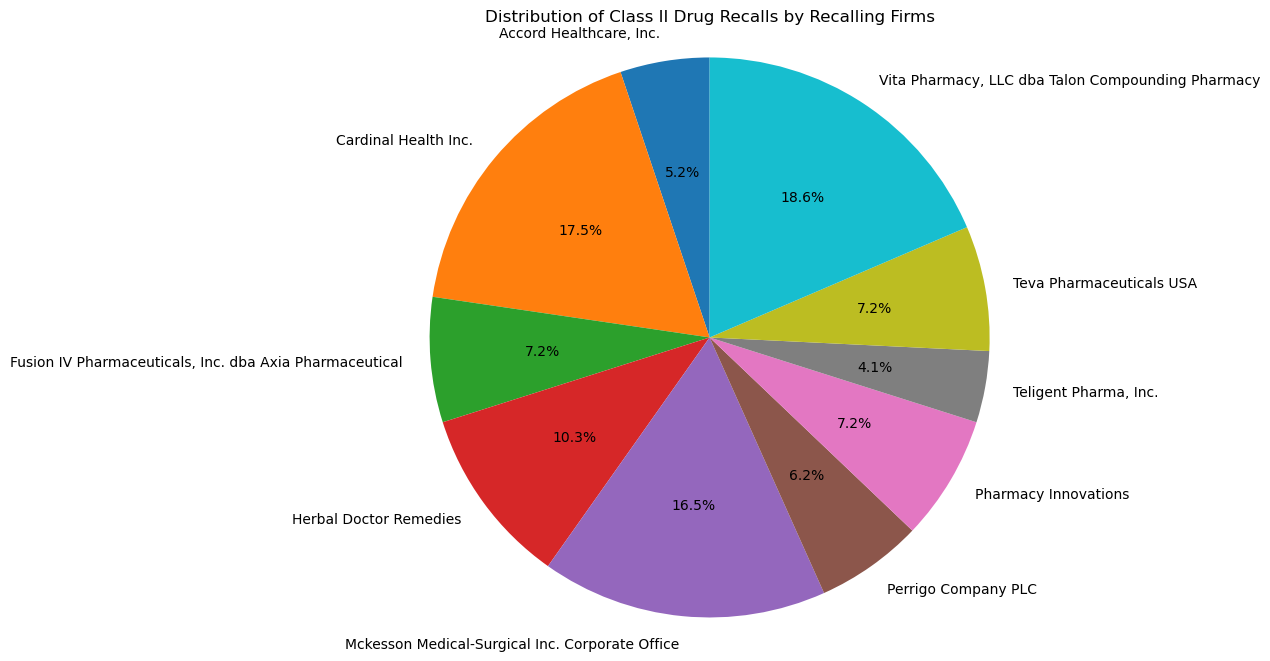

In [20]:
 #Filter for Class I drugs
class_ii_data = drug_types_by_company[drug_types_by_company['Classification'] == 'Class II']

# Create a pie chart for Class I recalls by each recalling firm
plt.figure(figsize=(10, 8))
plt.pie(class_ii_data['Recall Count'], labels=class_ii_data['Recalling Firm'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class II Drug Recalls by Recalling Firms')
plt.axis('equal')  

plt.savefig("./output_data/class_ii_drug_recalls_firms.jpeg")  
plt.show()#

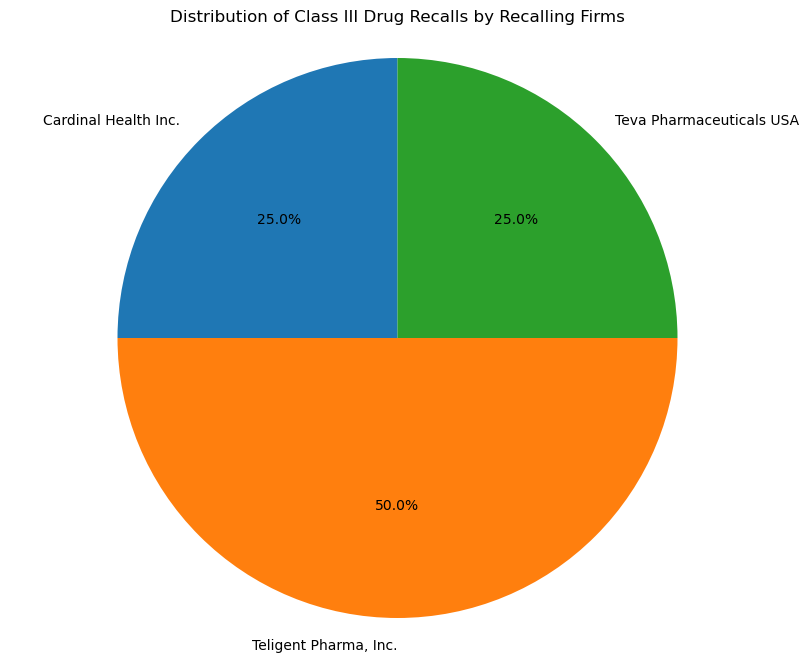

In [21]:
# Filter for Class I drugs
class_iii_data = drug_types_by_company[drug_types_by_company['Classification'] == 'Class III']

# Create a pie chart for Class I recalls by each recalling firm
plt.figure(figsize=(10, 8))
plt.pie(class_iii_data['Recall Count'], labels=class_iii_data['Recalling Firm'], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Class III Drug Recalls by Recalling Firms')
plt.axis('equal') 

plt.savefig("./output_data/class_iii_drug_recalls_firms.jpeg")  
plt.show()

# Recall Times per Recalling Firm

In [22]:
# List of top ten firms
top_ten_firms = [
    'Cardinal Health Inc.', 
    'Vita Pharmacy, LLC dba Talon Compounding Pharmacy',
    'Mckesson Medical-Surgical Inc. Corporate Office',
    'Herbal Doctor Remedies',
    'Teva Pharmaceuticals USA',
    'Teligent Pharma, Inc.',
    'Fusion IV Pharmaceuticals, Inc. dba Axia Pharmaceutical', 
    'Pharmacy Innovations',
    'Perrigo Company PLC',
    'Accord Healthcare, Inc.'
]

# Clean DataFrame to include only the specified top ten firms
top_ten_df = US_recalls_df[US_recalls_df['Recalling Firm'].isin(top_ten_firms)]

# Display the filtered DataFrame
#top_ten_df


In [23]:
##FOR SOME REASON I NEED TO RUN THIS CELL EVEN WITH ITS ERORRS FOR THE NEXT CELL TO WORK##
#How much time it takes to close a recall.
#	-who took most time to recall.

# Convert date columns to datetime format (adjust column names as necessary)
top_ten_df['Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
top_ten_df['Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
top_ten_df['Time to Close (Days)'] = (top_ten_df['Termination Date'] - top_ten_df['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
#longest_time_recall = top_ten_df[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
#longest_time_firm = longest_time_recall.loc[longest_time_recall['Time to Close (Days)'].idxmax()]

C:\Users\silve\AppData\Local\Temp\ipykernel_23052\324198110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_df['Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
C:\Users\silve\AppData\Local\Temp\ipykernel_23052\324198110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_df['Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])
C:\Users\silve\AppData\Local\Temp\ipykernel_23052\324198110.py:10: SettingWithCopyWarning: 
A value is trying to be 

In [24]:
# Convert date columns to datetime format (adjust column names as necessary)
top_ten_df.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
top_ten_df.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
top_ten_df.loc[:, 'Time to Close (Days)'] = (top_ten_df['Termination Date'] - top_ten_df['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall = top_ten_df[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall.loc[longest_time_recall['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall.sort_values(by='Time to Close (Days)', ascending=False))


Firm that took the most time to close a recall:
Recalling Firm          Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...
Time to Close (Days)                                               1422.0
Name: 2, dtype: object

Average Time to Close Recalls by Firm:
                                      Recalling Firm  Time to Close (Days)
2  Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...           1422.000000
3                             Herbal Doctor Remedies           1402.000000
1                               Cardinal Health Inc.           1137.222222
7                              Teligent Pharma, Inc.            992.714286
8                           Teva Pharmaceuticals USA            783.875000
9  Vita Pharmacy, LLC dba Talon Compounding Pharmacy            722.000000
5                                Perrigo Company PLC            625.000000
6                               Pharmacy Innovations            587.000000
4    Mckesson Medical-Surgical Inc. Corporate Office            57

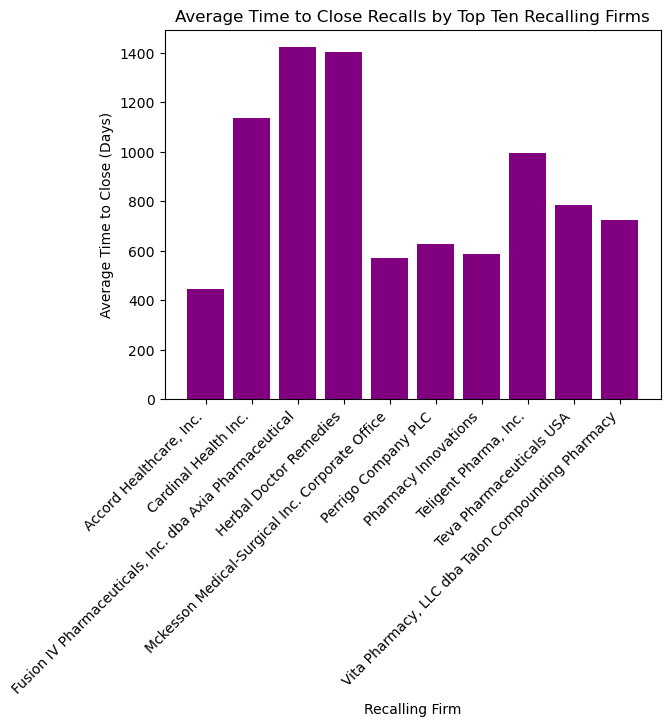

In [25]:
#Bar graph of Recall times by drug types DO THIS SOON
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall['Recalling Firm'], longest_time_recall['Time to Close (Days)'], color='purple')
plt.title('Average Time to Close Recalls by Top Ten Recalling Firms')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/average_total_recall_time.jpeg")
plt.show()

## Average Time to Close Recalls of Class I Drugs by Top Ten Firms

In [26]:
classi_firms = top_ten_df[top_ten_df['Classification'] == 'Class I']

classi_firms

,Status,City,State,Country,Classification,Product Type,Recalling Firm,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Termination Date,Time to Close (Days)
160,Terminated,Buena,NJ,United States,Class I,Drugs,"Teligent Pharma, Inc.",Lidocaine Hydrochloride Topical Solution USP 4...,"52,104 glass bottles",Superpotent Drug,2021-10-12,2024-06-18,980
188,Terminated,Durham,NC,United States,Class I,Drugs,"Accord Healthcare, Inc.",Daptomycin for Injection 350 mg/vial 1 Single-...,Unknown,Labeling mixup: cartons labeled as Daptomycin ...,2022-11-29,2024-02-22,450


In [27]:
# Convert date columns to datetime format (adjust column names as necessary)
classi_firms.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
classi_firms.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
classi_firms.loc[:, 'Time to Close (Days)'] = (classi_firms['Termination Date'] - classi_firms['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall1 = classi_firms[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall1.loc[longest_time_recall1['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall1.sort_values(by='Time to Close (Days)', ascending=False))

Firm that took the most time to close a recall:
Recalling Firm          Teligent Pharma, Inc.
Time to Close (Days)                    980.0
Name: 1, dtype: object

Average Time to Close Recalls by Firm:
            Recalling Firm  Time to Close (Days)
1    Teligent Pharma, Inc.                 980.0
0  Accord Healthcare, Inc.                 450.0


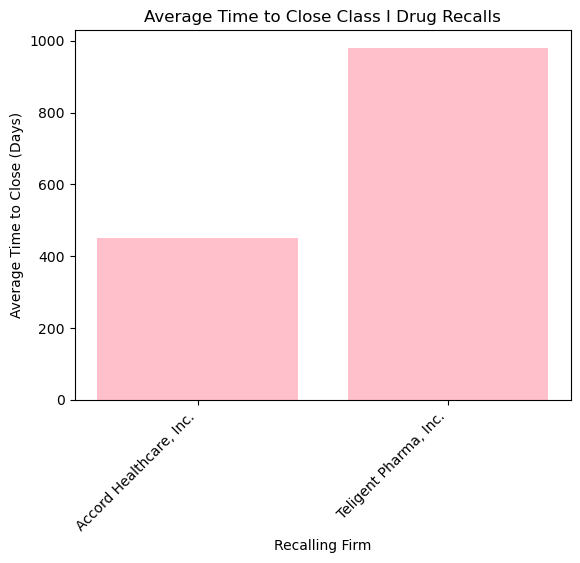

In [28]:
#Plot Bar Graph
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall1['Recalling Firm'], longest_time_recall1['Time to Close (Days)'], color='Pink')
plt.title('Average Time to Close Class I Drug Recalls')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/classIrecall_time.jpeg")
plt.show()

## Average Time to Close Recalls of Class II Drugs by Top Ten Firms

In [36]:
classii_firms = top_ten_df[top_ten_df['Classification'] == 'Class II']

classii_firms.head()

,Status,City,State,Country,Classification,Product Type,Recalling Firm,Product Description,Product Quantity,Reason for Recall,Recall Initiation Date,Termination Date,Time to Close (Days)
1,Terminated,Parsippany,NJ,United States,Class II,Drugs,Teva Pharmaceuticals USA,"Dextroamphetamine Saccharate, Amphetamine Aspa...","33,280 bottles",Some bottles may contain mixed strengths of th...,2020-05-22,2021-05-25,368
2,Terminated,Allegan,MI,United States,Class II,Drugs,Perrigo Company PLC,"No Drip Nasal Spray, Oxymetazoline HCl 0.05% N...","1,560 bottles",CGMP Deviations: Products were manufactured wi...,2021-10-26,2023-09-29,703
4,Terminated,Dublin,OH,United States,Class II,Drugs,Cardinal Health Inc.,Edarbi (azilsartan medoxomil) tablets 80 mg 30...,328 bottles,CGMP Deviations: Intermittent exposure to temp...,2021-03-15,2024-06-17,1190
13,Terminated,Los Angeles,CA,United States,Class II,Drugs,"Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...","Polyoxyl Lauryl Ether (Polidocanol) Injection,...",N/A,Lack of Assurance of Sterility,2020-01-15,2023-12-07,1422
15,Terminated,Dublin,OH,United States,Class II,Drugs,Cardinal Health Inc.,xigduo XR (dapgliflozin/metformin HCl extended...,664 bottles,CGMP Deviations: Intermittent exposure to temp...,2021-03-15,2024-06-17,1190


In [37]:
classii_firms.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
classii_firms.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
classii_firms.loc[:, 'Time to Close (Days)'] = (classii_firms['Termination Date'] - classii_firms['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall2 = classii_firms[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall2.loc[longest_time_recall['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall2.sort_values(by='Time to Close (Days)', ascending=False))

Firm that took the most time to close a recall:
Recalling Firm          Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...
Time to Close (Days)                                               1422.0
Name: 2, dtype: object

Average Time to Close Recalls by Firm:
                                      Recalling Firm  Time to Close (Days)
2  Fusion IV Pharmaceuticals, Inc. dba Axia Pharm...           1422.000000
3                             Herbal Doctor Remedies           1402.000000
1                               Cardinal Health Inc.           1190.000000
7                              Teligent Pharma, Inc.            929.750000
8                           Teva Pharmaceuticals USA            832.857143
9  Vita Pharmacy, LLC dba Talon Compounding Pharmacy            722.000000
5                                Perrigo Company PLC            625.000000
6                               Pharmacy Innovations            587.000000
4    Mckesson Medical-Surgical Inc. Corporate Office            57

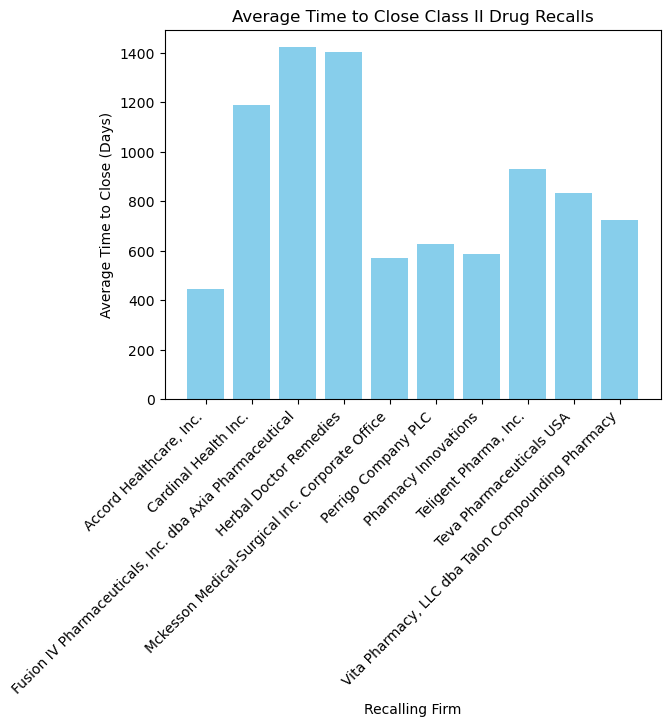

In [38]:
#Plot Bar Graph
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall2['Recalling Firm'], longest_time_recall2['Time to Close (Days)'], color='skyblue')
plt.title('Average Time to Close Class II Drug Recalls')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/classIIrecall_time.jpeg")
plt.show()

## Average Time to Close Recalls of Class II Drugs by Top Ten Firms

In [32]:
classiii_firms = top_ten_df[top_ten_df['Classification'] == 'Class III']

#classiii_firms

In [33]:
classiii_firms.loc[:, 'Recall Initiation Date'] = pd.to_datetime(top_ten_df['Recall Initiation Date'])
classiii_firms.loc[:, 'Termination Date'] = pd.to_datetime(top_ten_df['Termination Date'])

# Calculate the time taken to close each recall (in days)
classiii_firms.loc[:, 'Time to Close (Days)'] = (classiii_firms['Termination Date'] - classiii_firms['Recall Initiation Date']).dt.days

# Identify who took the most time to recall
longest_time_recall3 = classiii_firms[['Recalling Firm', 'Time to Close (Days)']].groupby('Recalling Firm').mean().reset_index()

# Get the firm that took the longest on average
longest_time_firm = longest_time_recall3.loc[longest_time_recall3['Time to Close (Days)'].idxmax()]

# Display the result
print("Firm that took the most time to close a recall:")
print(longest_time_firm)

# Optionally, you can also display all firms sorted by average recall closure time
print("\nAverage Time to Close Recalls by Firm:")
print(longest_time_recall3.sort_values(by='Time to Close (Days)', ascending=False))

Firm that took the most time to close a recall:
Recalling Firm          Teligent Pharma, Inc.
Time to Close (Days)                   1125.0
Name: 1, dtype: object

Average Time to Close Recalls by Firm:
             Recalling Firm  Time to Close (Days)
1     Teligent Pharma, Inc.                1125.0
2  Teva Pharmaceuticals USA                 441.0
0      Cardinal Health Inc.                 240.0


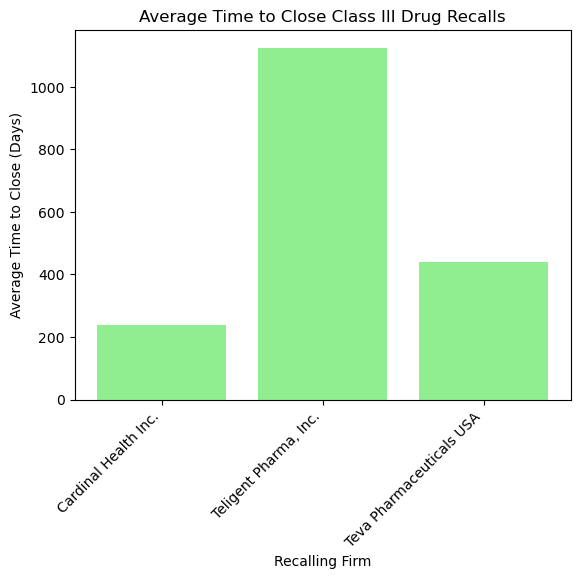

In [34]:
#Plot Bar Graph
#plt.figure(figsize=(10, 20))
plt.bar(longest_time_recall3['Recalling Firm'], longest_time_recall3['Time to Close (Days)'], color='lightgreen')
plt.title('Average Time to Close Class III Drug Recalls')
plt.xlabel('Recalling Firm')
plt.ylabel('Average Time to Close (Days)')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()

#save plot
plt.savefig(". ./output_data/classIIIrecall_time.jpeg")
plt.show()